In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("df_with_er_against.csv",sep=";")
df['State'] = df['State'].replace('Orrisa', 'Orissa')
df['State'] = df['State'].replace('Odisha', 'Orissa')
df.head()

Complainant           Against                  Date  \
0           Shri Dev Sharma  Shri Anand Verma            21-09-2020   
1          Shri Rajesh Daga            Editor  November }15, 2013 M   
2        Shri N.S. Shegokar  Mass Hero Weekly          June 23,1997   
3     Shri N. Prabhakarappa            Editor         August28,2000   
4  Shri V.A. Pai Panandiker       India Today      January 22, 1998   

                                            Decision  \
0  Disposed of as satisfactory action was taken b...   
1                                          Withdrawn   
2                                             Upheld   
3                                             Upheld   
4                             Contradiction directed   

                ComplaintType        ReportName  PrimaryKey  \
0          Press and Morality  AnnualReport2021         154   
1        Press and Defamation  AnnualReport2014        1373   
2        Press and Defamation  AnnualReport1998        3418   
3        Press and Defamation  AnnualReport2001        5016   
4  Principles and Publication  AnnualReport1998        3378   

                                           Complaint      Locations_Mapped  \
0  Complaint of Shri Dev Sharma, Shahjahanpur, U....         Uttar Pradesh   
1  Complaint of Shri Rajesh Daga, Associate ViceP...  West Bengal, Kolkata   
2  Complaint of Shri D.G. Malekar, Exec. Engineer...          Assam, Jalna   
3  Complaint of Shri N. Prabhakarappa, Deputy Sec...     Karnataka, Mysore   
4  Complaint of Shri V.A. Pai, Panandiker, Direct...      New delhi, Delhi   

           State                                    Complainant_Aff  \
0  Uttar Pradesh   Additional Director, Directorate General of H...   
1    West Bengal   Associate VicePresidnet (Sales Co-Ordinator),...   
2          Assam            Deputy Engineer of Public Work Division   
3      Karnataka    Deputy Secretary, Malnad Area Development Board   
4          Delhi               Director, Centre for Policy Research   

        Against_Aff           c_name_resolved  \
0     Dainik Jagran           Shri Dev Sharma   
1         Statesman          Shri Rajesh Daga   
2               NaN        Shri N.S. Shegokar   
3  Bhuvana Sangathi     Shri N. Prabhakarappa   
4               NaN  Shri V.A. Pai Panandiker   

                                      c_aff_resolved   c_location_resolved  \
0   Additional Director, Directorate General of H...         Uttar Pradesh   
1   Associate VicePresidnet (Sales Co-Ordinator),...  West Bengal, Kolkata   
2            Deputy Engineer of Public Work Division          Assam, Jalna   
3    Deputy Secretary, Malnad Area Development Board     Karnataka, Mysore   
4               Director, Centre for Policy Research      New delhi, Delhi   

    a_name_resolved    a_aff_resolved   a_location_resolved  
0  Shri Anand Verma     Dainik Jagran         Uttar Pradesh  
1            Editor         Statesman  West Bengal, Kolkata  
2  Mass Hero Weekly               NaN          Assam, Jalna  
3            Editor  Bhuvana Sangathi     Karnataka, Mysore  
4       India Today               NaN      New delhi, Delhi

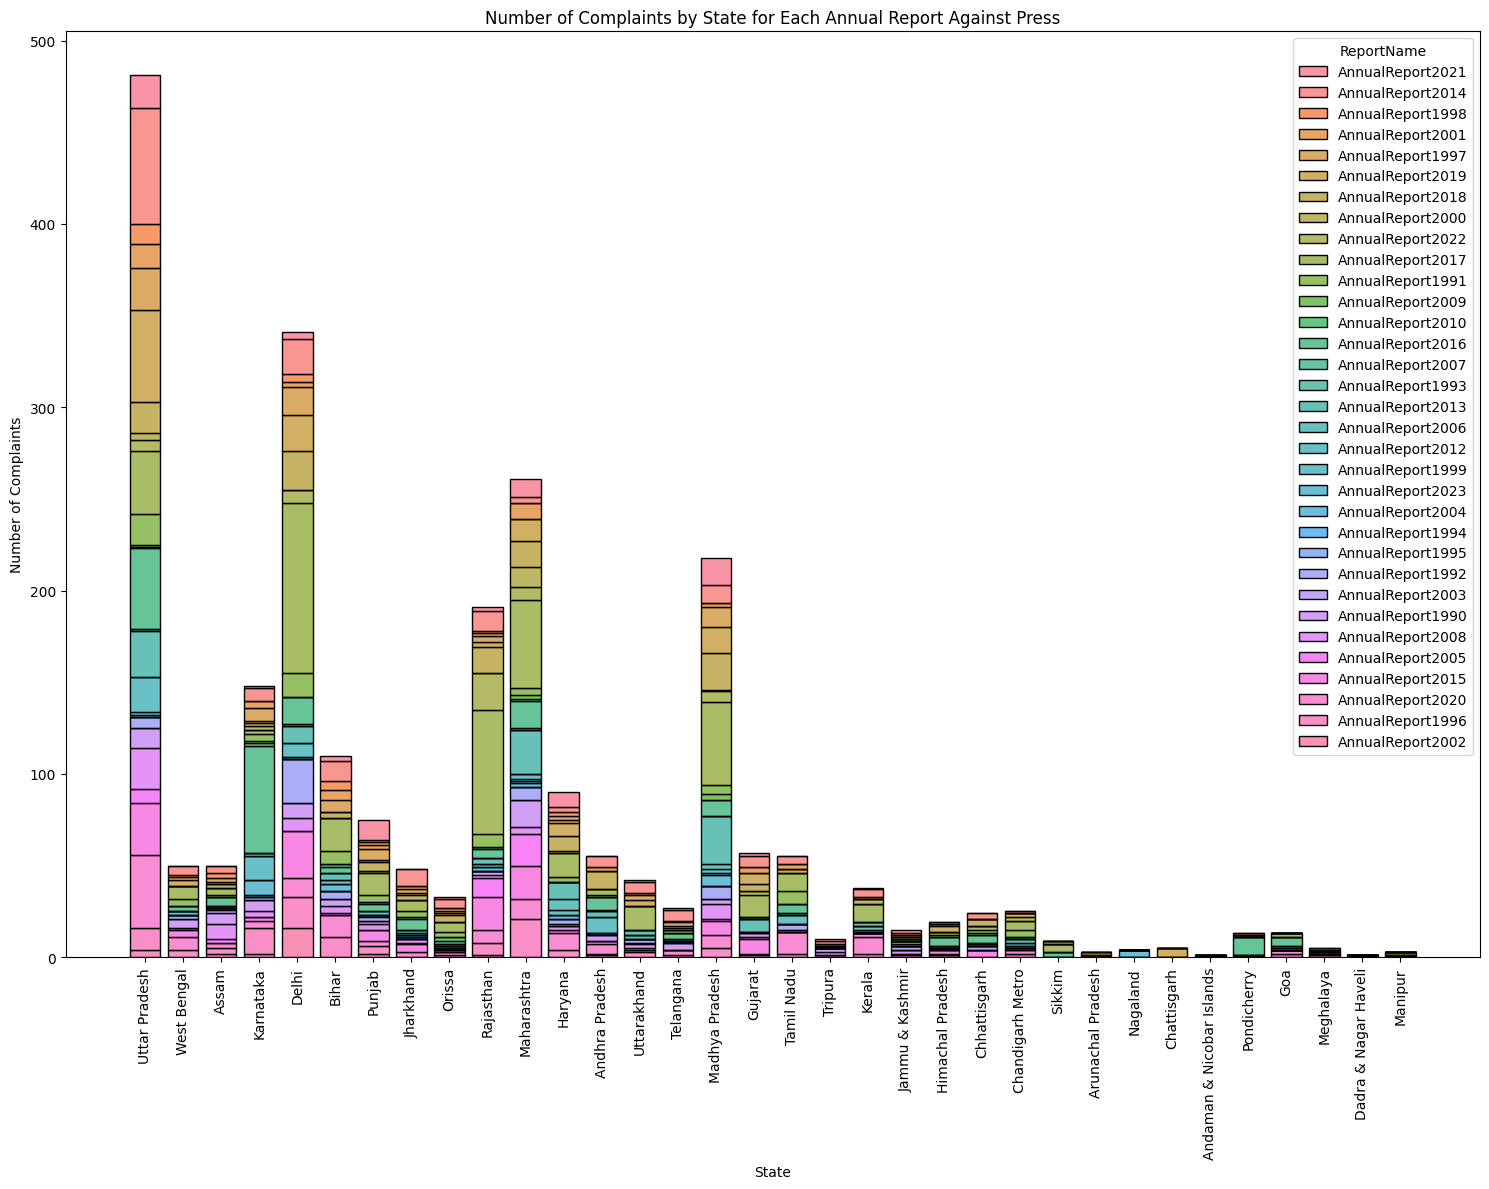

In [ ]:
plt.figure(figsize=(15, 12))
sns.histplot(data=df, x='State', hue='ReportName', multiple='stack', shrink=.8)
plt.title('Number of Complaints by State for Each Annual Report Against Press')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

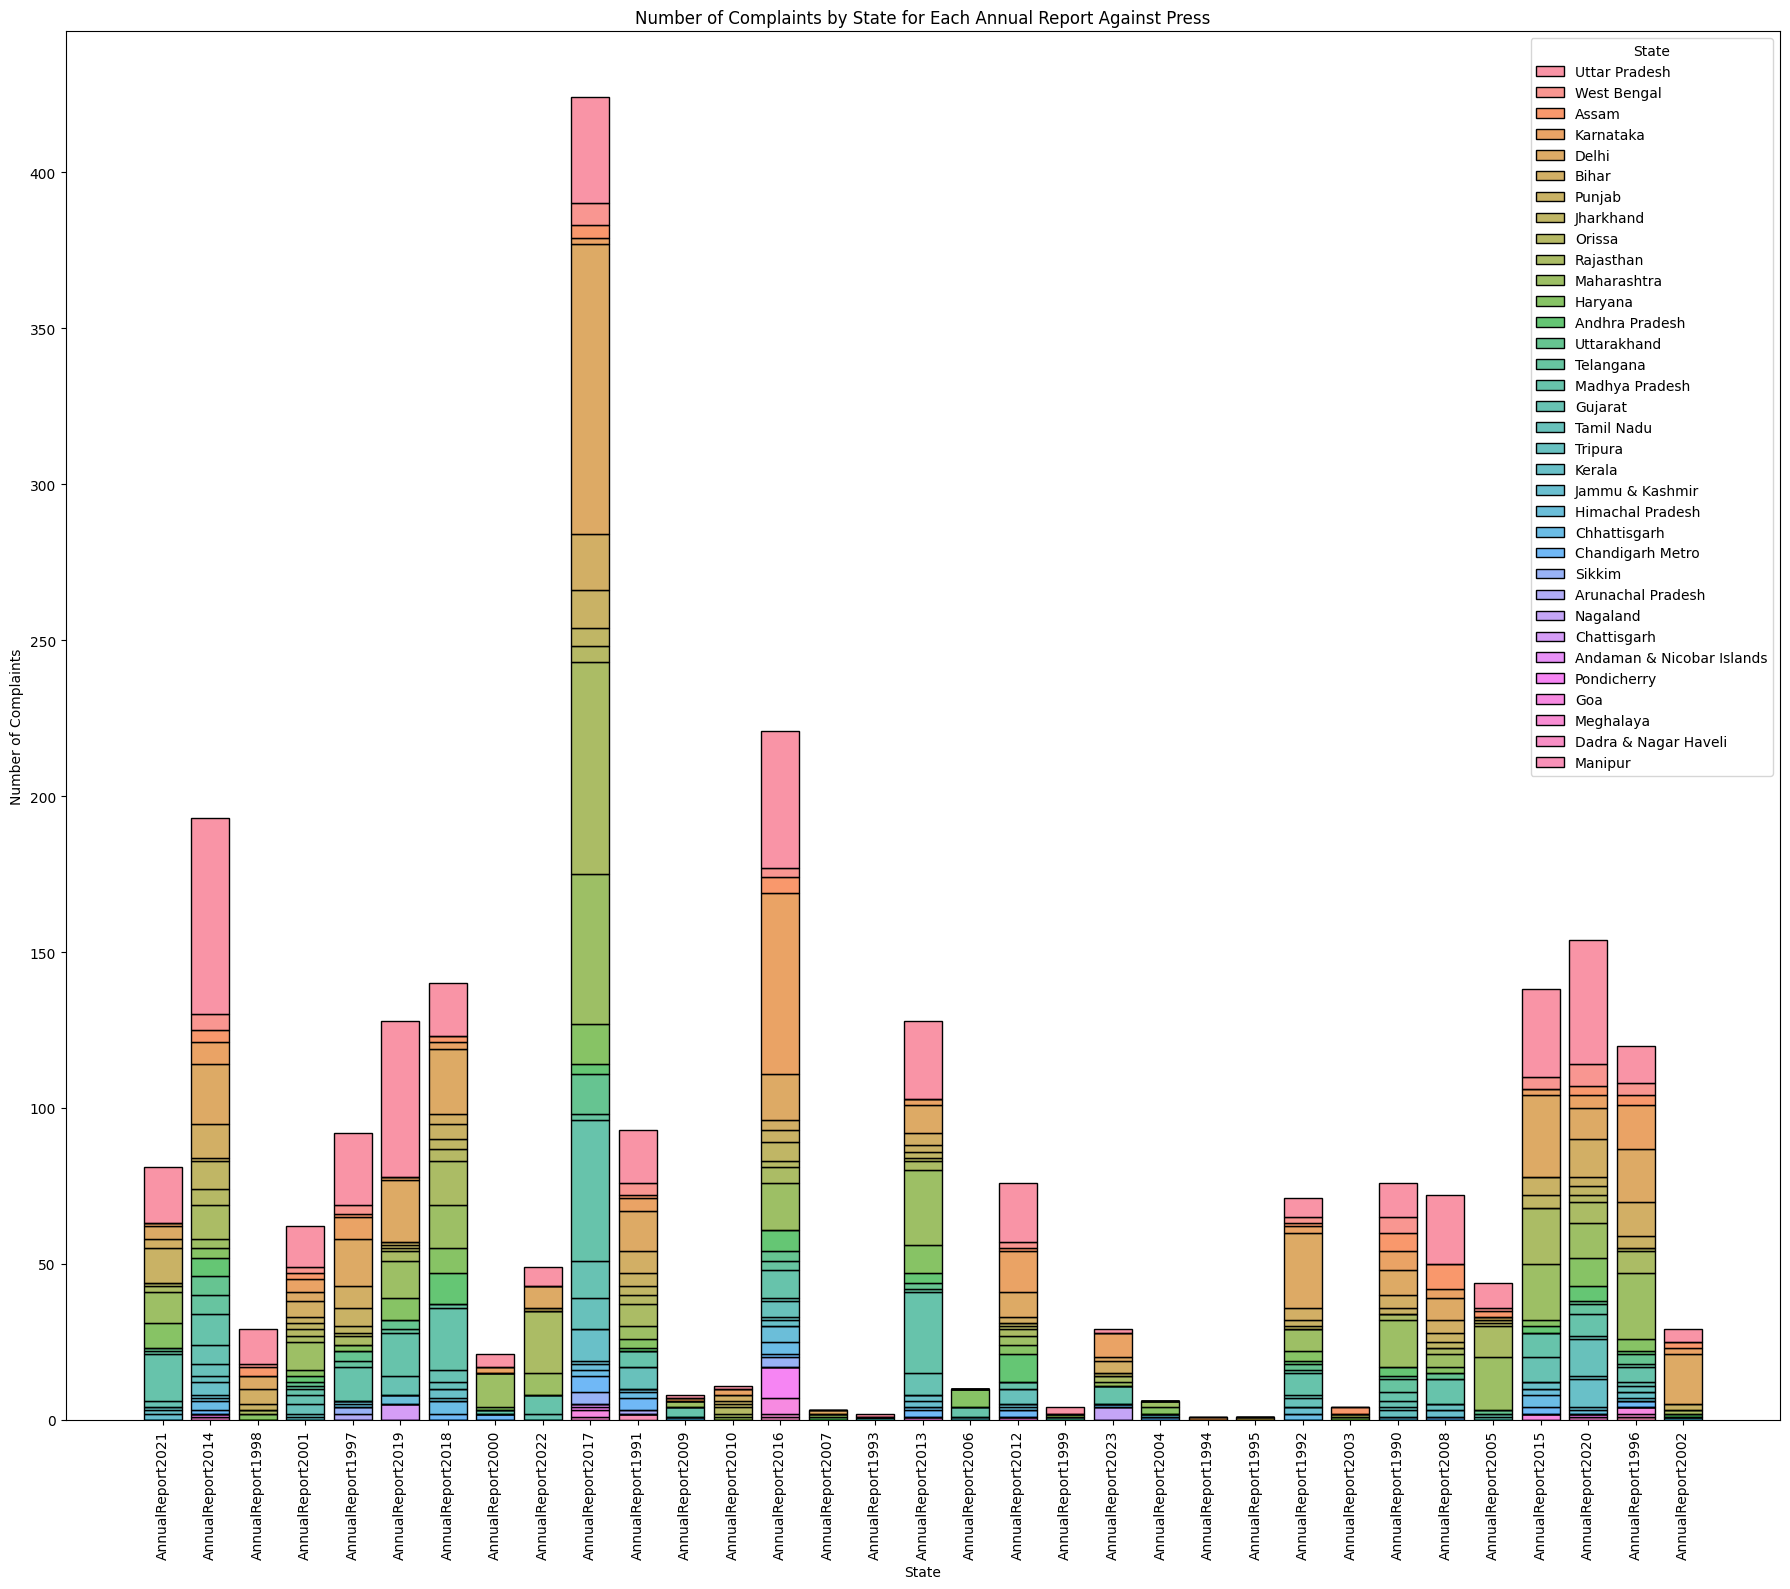

In [ ]:
plt.figure(figsize=(18, 16))
sns.histplot(data=df, x='ReportName', hue='State', multiple='stack', shrink=.8)

plt.title('Number of Complaints by State for Each Annual Report Against Press')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df['State'].unique()

array(['Uttar Pradesh', 'West Bengal', 'Assam', 'Karnataka', 'Delhi',
       'Bihar', 'Punjab', 'Jharkhand', 'Orissa', 'Rajasthan',
       'Maharashtra', 'Haryana', nan, 'Andhra Pradesh', 'Uttarakhand',
       'Telangana', 'Madhya Pradesh', 'Gujarat', 'Tamil Nadu', 'Tripura',
       'Kerala', 'Jammu & Kashmir', 'Himachal Pradesh', 'Chhattisgarh',
       'Chandigarh Metro', 'Sikkim', 'Arunachal Pradesh', 'Nagaland',
       'Chattisgarh', 'Andaman & Nicobar Islands', 'Pondicherry', 'Goa',
       'Meghalaya', 'Dadra & Nagar Haveli', 'Manipur'], dtype=object)

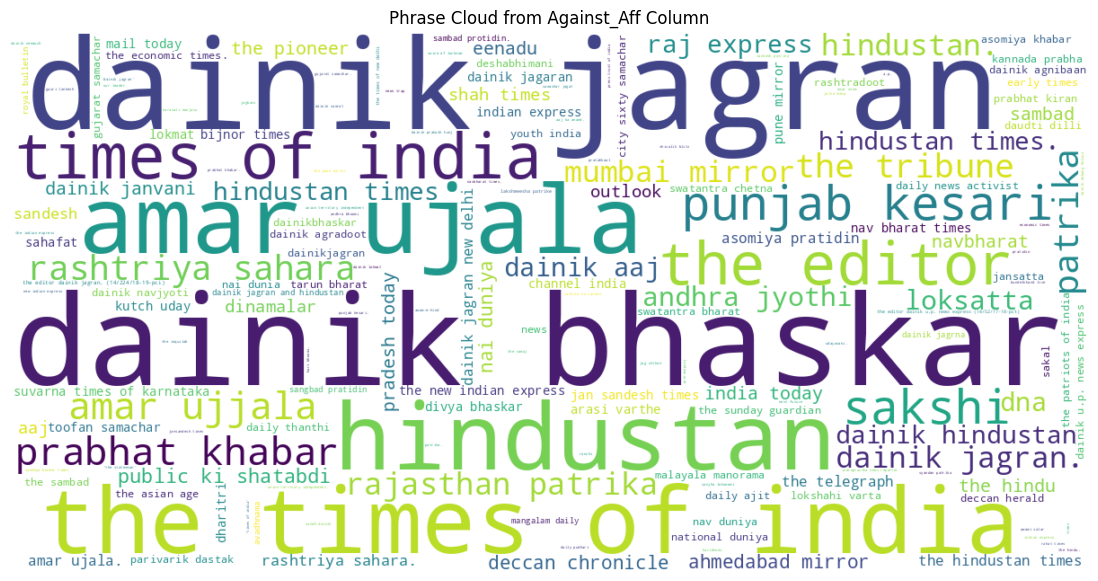

In [ ]:

import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Combine and clean all phrases
all_phrases = df['a_aff_resolved'].dropna().astype(str).str.cat(sep=';')
all_phrases = [phrase.strip().lower() for phrase in all_phrases.split(';') if phrase.strip()]

# Count phrase frequencies
phrase_freq = Counter(all_phrases)

# Generate the phrase cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(phrase_freq)

# Display the cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Phrase Cloud from Against_Aff Column")
plt.show()



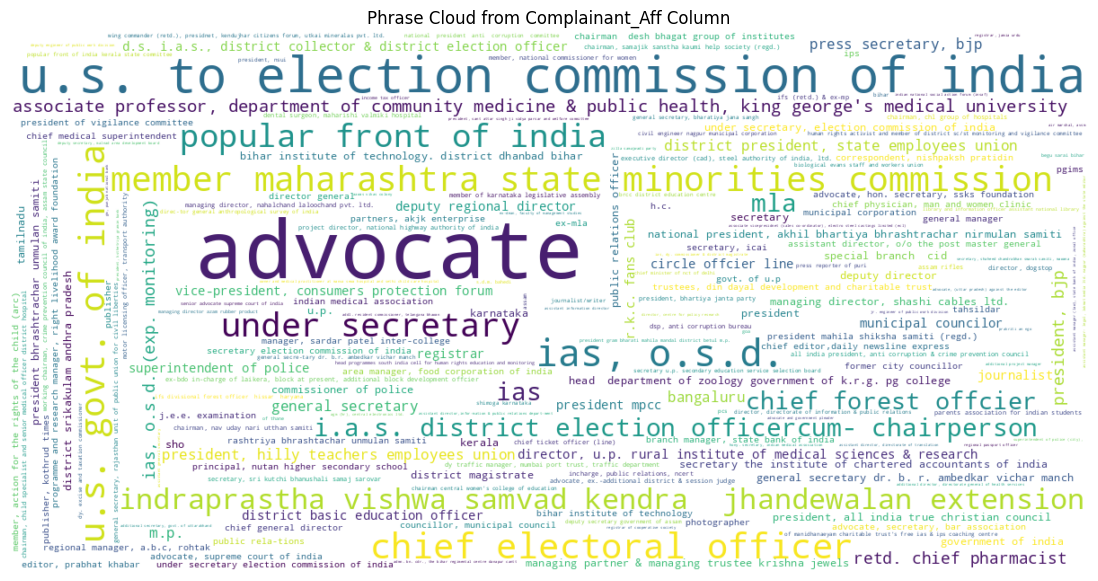

In [ ]:

import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Combine and clean all phrases
all_phrases = df['c_aff_resolved'].dropna().astype(str).str.cat(sep=';')
all_phrases = [phrase.strip().lower() for phrase in all_phrases.split(';') if phrase.strip()]

# Count phrase frequencies
phrase_freq = Counter(all_phrases)

# Generate the phrase cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(phrase_freq)

# Display the cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Phrase Cloud from Complainant_Aff Column")
plt.show()



In [ ]:
a=df['ComplaintType'].value_counts()

In [ ]:
a_dict = a.to_dict()
print(a_dict)

{'Press and Defamation': 1317, 'Principles and Publication': 585, 'Principles and Publications': 333, 'Paid News': 194, 'Principles and Defamation': 86, 'Press and Morality': 68, 'Communal, Casteist and Anti-National Writings': 19, 'Communal, Casteist, Anti-National And Religious Writings': 18, 'Suo-Motu': 4, 'Communal, Casteist, Anti National and Anti Religious Writing': 4, 'Communal Casteist, Anti-National And Anti Religious Writings': 4, 'Communal, Casteist, Anti National And Anti-Religious Writings': 4, 'Communal, Casteist, Anti National Anti- Religious Writings': 4, 'Communal Casteist, Anti National Anti-Religious Writings': 3, 'Misleading Advertisements': 2, 'Communal, Casteist, Anti National and Anti Religious Writings': 2, 'Communal, Casteist and Anti Religious Writings': 2, 'Communal Casteist, Anti National and Anti- Religious Writings': 1}


In [ ]:
!pip install rapidfuzz
from rapidfuzz import fuzz
from rapidfuzz.distance import Levenshtein, JaroWinkler

def hybrid_strict_score(a, b):
    #score3=0.9
    if a.strip()=="" and b.strip()=="":
      return 100
    score1 = fuzz.token_set_ratio(a, b)
    score2 = JaroWinkler.similarity(a, b) * 100


    return 0.5* score1 + 0.5 * score2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.3 MB/s eta 0:00:00


In [ ]:
def merge_similar_keys(data_dict, score_threshold=70):
    merged_dict = {}
    processed_keys = set()

    for key1, value1 in data_dict.items():
        if key1 in processed_keys:
            continue

        similar_keys = [key1]
        for key2 in data_dict.keys():
            if key1 != key2 and key2 not in processed_keys:
                score = hybrid_strict_score(key1, key2)
                if score > score_threshold:
                    similar_keys.append(key2)

        # Find the longest key among similar ones
        longest_key = max(similar_keys, key=len)

        # Sum the values of similar keys
        merged_value = sum(data_dict[key] for key in similar_keys)

        # Add to the merged dictionary
        merged_dict[longest_key] = merged_value

        # Mark similar keys as processed
        processed_keys.update(similar_keys)

    return merged_dict

merged_complaint_types = merge_similar_keys(a_dict)
print(merged_complaint_types)

{'Principles and Defamation': 1471, 'Principles and Publications': 918, 'Paid News': 194, 'Communal, Casteist, Anti National And Anti-Religious Writings': 61, 'Suo-Motu': 4, 'Misleading Advertisements': 2}


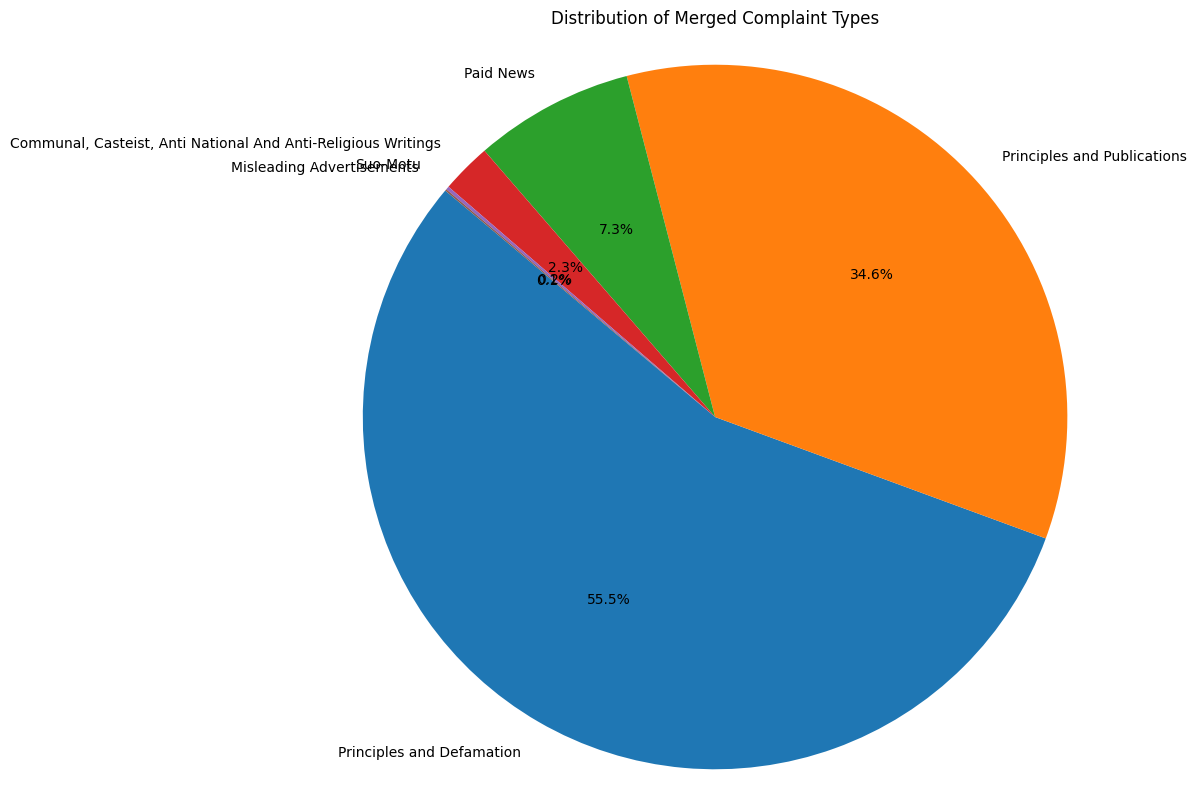

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(merged_complaint_types.values(), labels=merged_complaint_types.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Merged Complaint Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
def merge_similar_keys(data_dict, score_threshold=70):
    merged_dict = {}
    processed_keys = set()

    for key1, value1 in data_dict.items():
        if key1 in processed_keys:
            continue

        similar_keys = [key1]
        for key2 in data_dict.keys():
            if key1 != key2 and key2 not in processed_keys:
                score = hybrid_strict_score(key1, key2)
                if score > score_threshold:
                    similar_keys.append(key2)

        # Find the longest key among similar ones
        longest_key = max(similar_keys, key=len)

        # Sum the values of similar keys
        merged_value = sum(data_dict[key] for key in similar_keys)

        # Add to the merged dictionary
        merged_dict[longest_key] = merged_value

        # Mark similar keys as processed
        processed_keys.update(similar_keys)

    return merged_dict

merged_complaint_types = merge_similar_keys(a_dict)
print(merged_complaint_types)
# Fill None values in 'ComplaintType' with the previous non-None value

df['ComplaintType'].fillna(method='ffill', inplace=True)

# Create a new column 'res_ComplaintType' and initialize it
df['res_ComplaintType'] = None

for index, row in df.iterrows():
    # Calculate similarity scores with merged complaint types
    scores = {}
    for key in merged_complaint_types.keys():
        # Add a check for empty strings before calculating the score
        if isinstance(row["ComplaintType"], str) and isinstance(key, str) and row["ComplaintType"].strip() != "":
            scores[key] = hybrid_strict_score(row["ComplaintType"], key)
        else:
            scores[key] = 0 # Assign a score of 0 if ComplaintType is not a valid string

    # Find the key with the maximum score
    if scores:  # Check if scores dictionary is not empty
      max_key = max(scores, key=scores.get)
      # Assign the key with the maximum score to 'res_ComplaintType'
      df.loc[index, 'res_ComplaintType'] = max_key
    else:
      df.loc[index, 'res_ComplaintType'] = None # Assign None if no scores were calculated

# Optional: Display the updated DataFrame with the new column
# display(df[['ComplaintType', 'res_ComplaintType']].head())

/tmp/ipython-input-1371937273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ComplaintType'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1371937273.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ComplaintType'].fillna(method='ffill', inplace=True)


In [ ]:
df.head()

Complainant           Against                  Date  \
0           Shri Dev Sharma  Shri Anand Verma            21-09-2020   
1          Shri Rajesh Daga            Editor  November }15, 2013 M   
2        Shri N.S. Shegokar  Mass Hero Weekly          June 23,1997   
3     Shri N. Prabhakarappa            Editor         August28,2000   
4  Shri V.A. Pai Panandiker       India Today      January 22, 1998   

                                            Decision  \
0  Disposed of as satisfactory action was taken b...   
1                                          Withdrawn   
2                                             Upheld   
3                                             Upheld   
4                             Contradiction directed   

                ComplaintType        ReportName  PrimaryKey  \
0          Press and Morality  AnnualReport2021         154   
1        Press and Defamation  AnnualReport2014        1373   
2        Press and Defamation  AnnualReport1998        3418   
3        Press and Defamation  AnnualReport2001        5016   
4  Principles and Publication  AnnualReport1998        3378   

                                           Complaint      Locations_Mapped  \
0  Complaint of Shri Dev Sharma, Shahjahanpur, U....         Uttar Pradesh   
1  Complaint of Shri Rajesh Daga, Associate ViceP...  West Bengal, Kolkata   
2  Complaint of Shri D.G. Malekar, Exec. Engineer...          Assam, Jalna   
3  Complaint of Shri N. Prabhakarappa, Deputy Sec...     Karnataka, Mysore   
4  Complaint of Shri V.A. Pai, Panandiker, Direct...      New delhi, Delhi   

           State                                    Complainant_Aff  \
0  Uttar Pradesh   Additional Director, Directorate General of H...   
1    West Bengal   Associate VicePresidnet (Sales Co-Ordinator),...   
2          Assam            Deputy Engineer of Public Work Division   
3      Karnataka    Deputy Secretary, Malnad Area Development Board   
4          Delhi               Director, Centre for Policy Research   

        Against_Aff           c_name_resolved  \
0     Dainik Jagran           Shri Dev Sharma   
1         Statesman          Shri Rajesh Daga   
2               NaN        Shri N.S. Shegokar   
3  Bhuvana Sangathi     Shri N. Prabhakarappa   
4               NaN  Shri V.A. Pai Panandiker   

                                      c_aff_resolved   c_location_resolved  \
0   Additional Director, Directorate General of H...         Uttar Pradesh   
1   Associate VicePresidnet (Sales Co-Ordinator),...  West Bengal, Kolkata   
2            Deputy Engineer of Public Work Division          Assam, Jalna   
3    Deputy Secretary, Malnad Area Development Board     Karnataka, Mysore   
4               Director, Centre for Policy Research      New delhi, Delhi   

    a_name_resolved    a_aff_resolved   a_location_resolved  \
0  Shri Anand Verma     Dainik Jagran         Uttar Pradesh   
1            Editor         Statesman  West Bengal, Kolkata   
2  Mass Hero Weekly               NaN          Assam, Jalna   
3            Editor  Bhuvana Sangathi     Karnataka, Mysore   
4       India Today               NaN      New delhi, Delhi   

             res_ComplaintType  
0    Principles and Defamation  
1    Principles and Defamation  
2    Principles and Defamation  
3    Principles and Defamation  
4  Principles and Publications

In [ ]:
df['res_ComplaintType'].value_counts()

res_ComplaintType
Principles and Defamation                                        1471
Principles and Publications                                       918
Paid News                                                         194
Communal, Casteist, Anti National And Anti-Religious Writings      61
Suo-Motu                                                            4
Misleading Advertisements                                           2
Name: count, dtype: int64

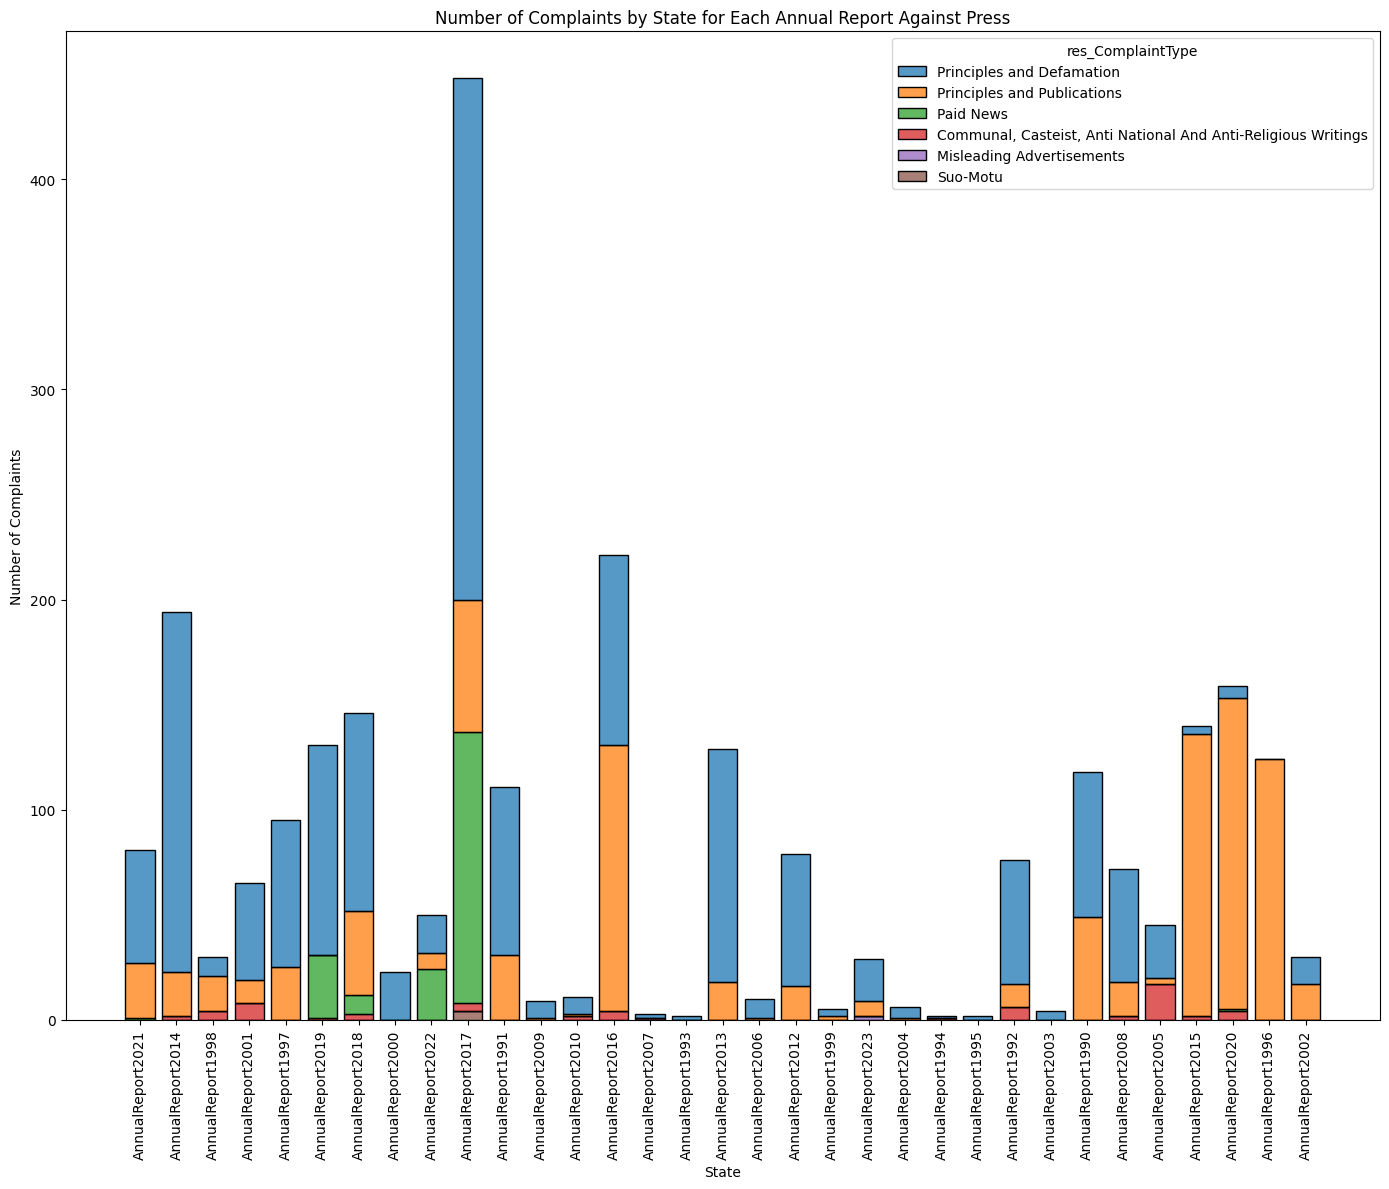

In [ ]:
plt.figure(figsize=(14, 12))
sns.histplot(data=df, x='ReportName', hue='res_ComplaintType', multiple='stack', shrink=.8)

plt.title('Number of Complaints by State for Each Annual Report Against Press')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
!pip install neo4j
uri = "neo4j+s://9f8ad4f3.databases.neo4j.io"
user = "neo4j"
password = "F3CtYtEOXok_XvPHRQI-3p2nk29ET4F6esGFHxcGdgE"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
from neo4j import GraphDatabase

driver = GraphDatabase.driver(uri, auth=(user, password))

def get_directed_graph_properties(tx):
    result = tx.run("""
        CALL {
            MATCH (n)
            RETURN count(n) AS node_count
        }
        CALL {
            MATCH ()-[r]->()
            RETURN count(r) AS rel_count
        }
        CALL {
            MATCH (n)<-[r]-()
            WITH n, count(r) AS in_degree
            ORDER BY in_degree DESC
            LIMIT 1
            RETURN in_degree AS max_in_degree
        }
        CALL {
            MATCH (n)-[r]->()
            WITH n, count(r) AS out_degree
            ORDER BY out_degree DESC
            LIMIT 1
            RETURN out_degree AS max_out_degree
        }
        RETURN
            node_count,
            rel_count,
            rel_count * 1.0 / node_count AS avg_out_degree,
            rel_count * 1.0 / node_count AS avg_in_degree,
            max_in_degree,
            max_out_degree,
            rel_count * 1.0 / (node_count * (node_count - 1)) AS density
        LIMIT 1
    """)
    return result.single()

with driver.session() as session:
    props = session.read_transaction(get_directed_graph_properties)

    print("Directed Graph Properties:")
    print(f"  Nodes            : {props['node_count']}")
    print(f"  Relationships    : {props['rel_count']}")
    print(f"  Avg In-Degree    : {props['avg_in_degree']:.2f}")
    print(f"  Avg Out-Degree   : {props['avg_out_degree']:.2f}")
    print(f"  Max In-Degree    : {props['max_in_degree']}")
    print(f"  Max Out-Degree   : {props['max_out_degree']}")
    print(f"  Density          : {props['density']:.6f}")

driver.close()

/tmp/ipython-input-2016013626.py:42: DeprecationWarning: read_transaction has been renamed to execute_read
  props = session.read_transaction(get_directed_graph_properties)


Directed Graph Properties:
  Nodes            : 7245
  Relationships    : 4650
  Avg In-Degree    : 0.64
  Avg Out-Degree   : 0.64
  Max In-Degree    : 34
  Max Out-Degree   : 44
  Density          : 0.000089


In [ ]:
a=df['State'].value_counts().to_frame()
a.index = a.index.str.replace('Uttarakhand', 'Uttaranchal')
a.index = a.index.str.replace('Jammu & Kashmir', 'Jammu and Kashmir')
a.index = a.index.str.replace('Chandigarh Metro', 'Chandigarh')
a.head(30)

count
State                   
Uttar Pradesh        481
Delhi                341
Maharashtra          261
Madhya Pradesh       218
Rajasthan            191
Karnataka            148
Bihar                110
Haryana               90
Punjab                75
Gujarat               57
Andhra Pradesh        55
Tamil Nadu            55
West Bengal           50
Assam                 50
Jharkhand             48
Uttaranchal           42
Kerala                38
Orissa                33
Telangana             27
Chandigarh            25
Chhattisgarh          24
Himachal Pradesh      19
Jammu and Kashmir     15
Pondicherry           13
Goa                   13
Tripura               10
Sikkim                 9
Meghalaya              5
Chattisgarh            5
Nagaland               4

In [ ]:
!pip install rapidfuzz geopandas
!pip install mapclassify


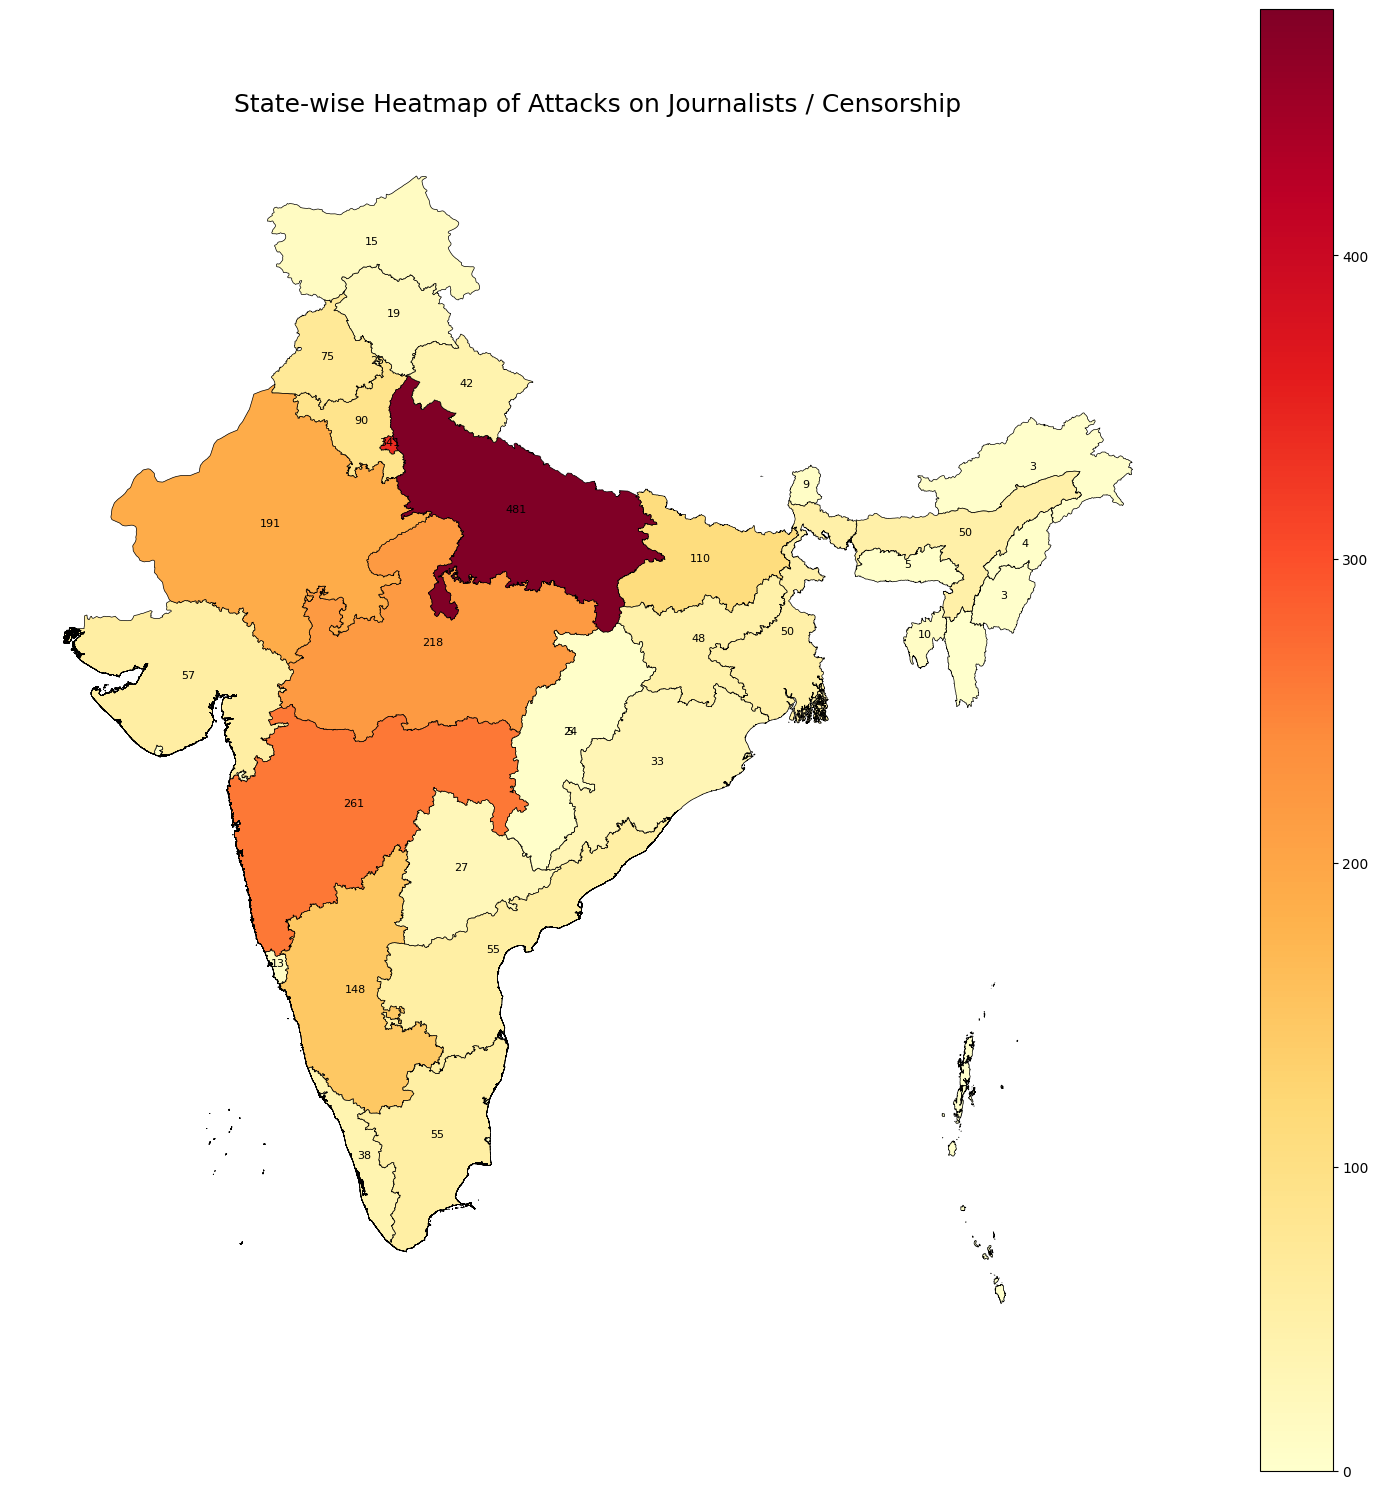

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz
import mapclassify


# === Load India GeoJSON ===
india = gpd.read_file("https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson")

# === Fuzzy Match Function ===
india_states = india['NAME_1'].tolist()

def match_state(state_name, choices, threshold=90):
    match, score, _ = process.extractOne(state_name, choices, scorer=fuzz.token_sort_ratio)
    return match if score >= threshold else None

# Use a.index to access the state names for matching
a['MatchedState'] = a.index.to_series().apply(lambda x: match_state(x, india_states))
a_matched = a.dropna(subset=['MatchedState'])

# === Merge GeoJSON with your data ===
merged = india.merge(a_matched, left_on='NAME_1', right_on='MatchedState', how='left')
merged['count'] = merged['count'].fillna(0)

# === Define color bins (gap = 50) ===
max_val = merged['count'].max()
bins = list(range(0, int(max_val) + 51, 50))  # e.g., [0, 50, 100, 150, ...]

# === Plot with custom bins ===
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged.plot(
    column='count',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    edgecolor='black',
    linewidth=0.5,
    # Removed scheme and classification_kwds as we can handle bins with matplotlib
)

# === Add counts at centroids ===
for idx, row in merged.iterrows():
    if row['count'] > 0:
        plt.annotate(
            text=f"{int(row['count'])}",
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            ha='center',
            fontsize=8,
            color='black'
        )

plt.title("State-wise Heatmap of Attacks on Journalists / Censorship", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
india

ID_0  ISO NAME_0  ID_1                  NAME_1  \
0    105  IND  India     1     Andaman and Nicobar   
1    105  IND  India    36               Telangana   
2    105  IND  India     2          Andhra Pradesh   
3    105  IND  India     3       Arunachal Pradesh   
4    105  IND  India     4                   Assam   
5    105  IND  India     5                   Bihar   
6    105  IND  India     6              Chandigarh   
7    105  IND  India     7            Chhattisgarh   
8    105  IND  India     8  Dadra and Nagar Haveli   
9    105  IND  India     9           Daman and Diu   
10   105  IND  India    10                   Delhi   
11   105  IND  India    11                     Goa   
12   105  IND  India    12                 Gujarat   
13   105  IND  India    13                 Haryana   
14   105  IND  India    14        Himachal Pradesh   
15   105  IND  India    15       Jammu and Kashmir   
16   105  IND  India    16               Jharkhand   
17   105  IND  India    17               Karnataka   
18   105  IND  India    18                  Kerala   
19   105  IND  India    19             Lakshadweep   
20   105  IND  India    20          Madhya Pradesh   
21   105  IND  India    21             Maharashtra   
22   105  IND  India    22                 Manipur   
23   105  IND  India    23               Meghalaya   
24   105  IND  India    24                 Mizoram   
25   105  IND  India    25                Nagaland   
26   105  IND  India    26                  Orissa   
27   105  IND  India    27              Puducherry   
28   105  IND  India    28                  Punjab   
29   105  IND  India    29               Rajasthan   
30   105  IND  India    30                  Sikkim   
31   105  IND  India    31              Tamil Nadu   
32   105  IND  India    32                 Tripura   
33   105  IND  India    33           Uttar Pradesh   
34   105  IND  India    34             Uttaranchal   
35   105  IND  India    35             West Bengal   

                                             geometry  
0   MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
1   POLYGON ((77.50945 15.92086, 77.51458 15.94343...  
2   MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...  
3   POLYGON ((96.15778 29.3831, 96.1638 29.37668, ...  
4   MULTIPOLYGON (((89.87145 25.5373, 89.87118 25....  
5   MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...  
6   POLYGON ((76.81981 30.68583, 76.81051 30.68495...  
7   POLYGON ((83.3276 24.09965, 83.34575 24.09707,...  
8   POLYGON ((72.99046 20.29209, 73.00357 20.29314...  
9   MULTIPOLYGON (((72.86014 20.47096, 72.8634 20....  
10  POLYGON ((77.21732 28.83528, 77.21365 28.8135,...  
11  MULTIPOLYGON (((73.78181 15.35569, 73.78181 15...  
12  MULTIPOLYGON (((70.86097 20.75292, 70.86097 20...  
13  POLYGON ((76.83715 30.87887, 76.85243 30.87069...  
14  POLYGON ((76.80276 33.23666, 76.8063 33.23623,...  
15  POLYGON ((77.89957 35.42789, 77.90297 35.42759...  
16  POLYGON ((87.59989 25.31466, 87.60688 25.31138...  
17  MULTIPOLYGON (((74.67097 13.19986, 74.67097 13...  
18  MULTIPOLYGON (((76.46736 9.54097, 76.46736 9.5...  
19  MULTIPOLYGON (((73.01014 8.28042, 73.01014 8.2...  
20  POLYGON ((78.36465 26.86884, 78.36688 26.86259...  
21  MULTIPOLYGON (((73.45597 15.88986, 73.45597 15...  
22  POLYGON ((94.57723 25.64833, 94.57609 25.6447,...  
23  POLYGON ((91.85384 26.10479, 91.8647 26.10035,...  
24  POLYGON ((92.8008 24.41905, 92.8037 24.41879, ...  
25  POLYGON ((95.21445 26.93695, 95.21706 26.9342,...  
26  MULTIPOLYGON (((84.76986 19.10597, 84.76986 19...  
27  MULTIPOLYGON (((79.84486 10.82653, 79.84486 10...  
28  POLYGON ((75.86877 32.48868, 75.88712 32.47203...  
29  POLYGON ((73.88944 29.97761, 73.89118 29.97007...  
30  POLYGON ((88.64526 28.09912, 88.65411 28.08984...  
31  MULTIPOLYGON (((77.55596 8.07903, 77.55596 8.0...  
32  POLYGON ((92.1852 24.52287, 92.18896 24.52019,...  
33  POLYGON ((77.58468 30.40878, 77.58639 30.40801...  
34  POLYGON ((79.19478 31.35362, 79.19817 31.